In [1]:
from graph_drawer import get_nx_representation, draw_graph
from dataset import PacketsDatapipe, get_labels
import matplotlib.pyplot as plt
import numpy as np

In [2]:
packet_list_dataset_location = r'App\src\build_release\VNAT\packet_list_dataset'
size_delay_dataset_location = r'App\src\build_release\VNAT\size_delay_dataset'
dataset = PacketsDatapipe(size_delay_dataset_location, batch_size=1, balanced=True)[0]

0 (nonvpn-netflix): 15238
1 (nonvpn-rdp): 4594
2 (nonvpn-rsync): 24666
3 (nonvpn-scp): 9311
4 (nonvpn-sftp): 90904
5 (nonvpn-skype-chat): 5465
7 (nonvpn-vimeo): 11597
9 (nonvpn-youtube): 5447
10 (vpn-netflix): 4201
11 (vpn-rdp): 6420
14 (vpn-sftp): 29592
15 (vpn-skype-chat): 6936
17 (vpn-vimeo): 6299
19 (vpn-youtube): 3949
Balanced to: 3949


# Draw size delay representaion

Label: vpn-skype-chat


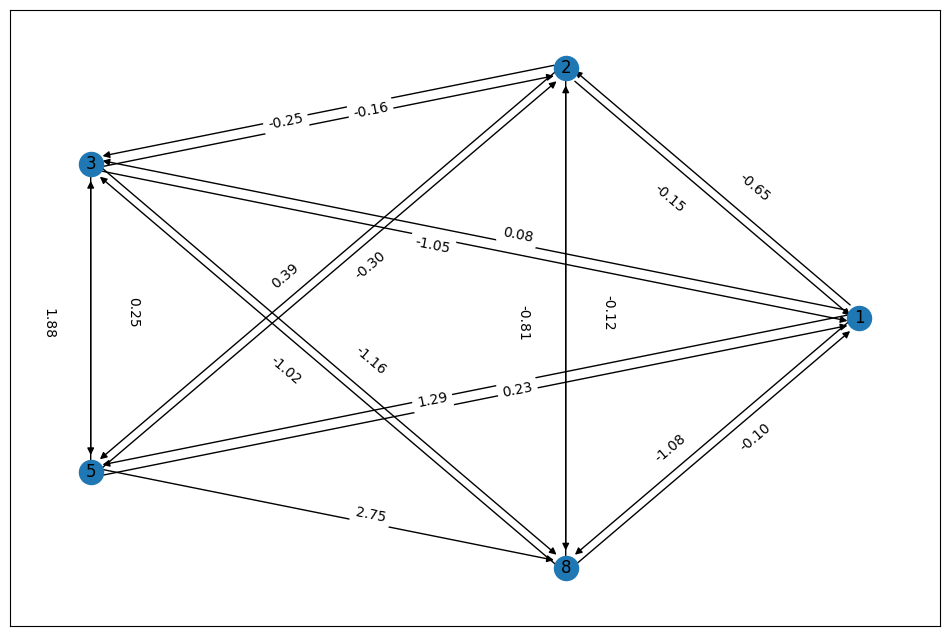

DiGraph with 5 nodes and 19 edges


In [53]:
graph = next(iter(dataset))
print(f'Label: {get_labels()[graph.y.item()]}')
plt.figure(figsize=(12, 8))
G = get_nx_representation(graph.x, graph.edge_index)
draw_graph(G)

print(G)

# Draw packet list representaion

Label: vpn-netflix


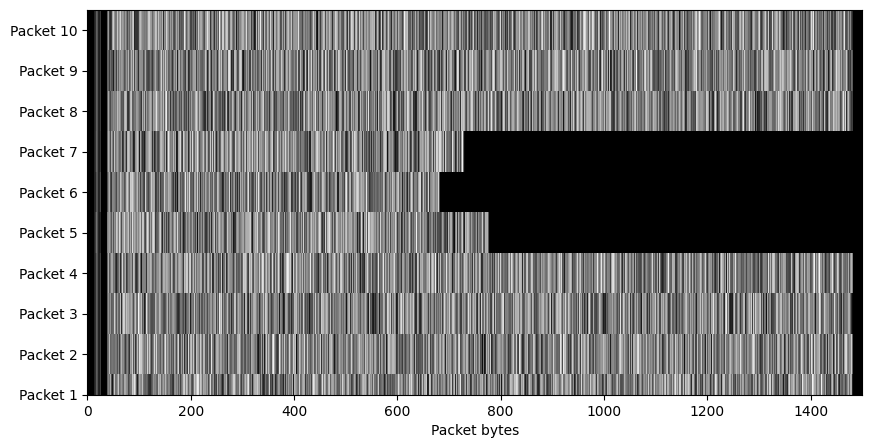

In [37]:
graph = next(iter(dataset))
print(f'Label: {get_labels()[graph.y.item()]}')

bw_values = (graph.x.numpy() * 255).astype(int)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Iterate through each row in the tensor
for i in range(bw_values.shape[0]):
    vector = bw_values[i, :]
    
    # Create a colored strip for each vector
    color_strip = np.zeros((1, bw_values.shape[1], 3), dtype=np.uint8)
    color_strip[:, :, 0] = vector
    color_strip[:, :, 1] = vector
    color_strip[:, :, 2] = vector
    
    # Display the colored strip
    ax.imshow(color_strip, extent=[0, bw_values.shape[1], i, i + 1], aspect='auto')

# Set y-axis ticks and labels
ax.set_yticks(np.arange(0.5, bw_values.shape[0], 1))
ax.set_yticklabels([f"Packet {i+1}" for i in range(bw_values.shape[0])])

# Set x-axis label
ax.set_xlabel('Packet bytes')

# Show the plot
plt.show()
